## 1) Import relevant libraries

In [367]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import numpy as np
import math
import missingno as msno
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## 2) Sourcing and loading

In [3]:
#Load Accounts data from 'AllAccountReads.xlsx' file

#Load Accounts data for year 2017-2018
data1 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_17_18')
#Load Accounts data for year 2018-2019
data2 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_18_19')
#Load Accounts data for year 2019-2020
data3 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_19_20')

In [246]:
df1 = data1.copy()
df2 = data2.copy()
df3 = data3.copy()

## 3) Overview DataFrames

In [247]:
print('df1')
print(df1.head(3).T)
print('df2')
print(df2.head(3).T)
print('df3')
print(df3.head(3).T)

df1
                                   0                    1                    2
LOC ID                    1000000000           1000000001           1000000002
WTR_RATE                      W-RSFD               W-RSFD               W-RSFD
WTR_DWEL_UNIT                      1                    1                    1
WTR_USE1                          22                    9                   10
WTR_USE2                          22                    8                    7
WTR_USE3                          15                    7                    7
WTR_USE4                           9                    5                    8
WTR_USE5                          10                    4                    7
WTR_USE6                          10                    7                    8
WTR_USE7                          11                    5                   12
WTR_USE8                           9                    6                   10
WTR_USE9                          11            

#### Over the three years each period for every unique LOC ID is recognized with:

     1) the number of days(WTR_READ_DAYS)
    
     2) read date(WTR_READ_DT)
    
     3) amount of water usage(WTR_USE)

The order of read dates is from read date12 to read date1. Consequently the order of water usage and water usage columns are from 12 to 1.
For example, for the first and second users with location Id of 1000000000 and 1000000001: Read date12(WTR_READ_DT12) was in Augest then read date11(WTR_READ_DT11) was on September and so on. 

In [248]:
#Check the index column.
print('df1 Index:',df1.index)
print('df2 Index:',df2.index)
print('df3 Index:',df3.index)

df1 Index: RangeIndex(start=0, stop=78894, step=1)
df2 Index: RangeIndex(start=0, stop=78894, step=1)
df3 Index: RangeIndex(start=0, stop=78894, step=1)


In [249]:
#Strip the 'WTR' form the name of columns. and change the 'LOC ID' to 'LOC_ID'.
col_labels = df1.columns.str.replace('WTR_','')
col_labels = col_labels.str.replace(' ','_')

df1.columns = col_labels
df2.columns = col_labels
df3.columns = col_labels

In [250]:
#Call the info method on df1 to see a summary of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78894 entries, 0 to 78893
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LOC_ID       78894 non-null  int64         
 1   RATE         78894 non-null  object        
 2   DWEL_UNIT    77632 non-null  float64       
 3   USE1         78489 non-null  float64       
 4   USE2         78053 non-null  float64       
 5   USE3         77627 non-null  float64       
 6   USE4         77228 non-null  float64       
 7   USE5         76853 non-null  float64       
 8   USE6         76535 non-null  float64       
 9   USE7         76200 non-null  float64       
 10  USE8         75845 non-null  float64       
 11  USE9         75476 non-null  float64       
 12  USE10        75112 non-null  float64       
 13  USE11        74762 non-null  float64       
 14  USE12        74363 non-null  float64       
 15  READ_DT1     78488 non-null  datetime64[ns]
 16  READ

In [251]:
#Overview df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78894 entries, 0 to 78893
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LOC_ID       78894 non-null  int64         
 1   RATE         78894 non-null  object        
 2   DWEL_UNIT    77626 non-null  float64       
 3   USE1         78829 non-null  float64       
 4   USE2         78783 non-null  float64       
 5   USE3         78726 non-null  float64       
 6   USE4         78683 non-null  float64       
 7   USE5         78642 non-null  float64       
 8   USE6         78610 non-null  float64       
 9   USE7         78579 non-null  float64       
 10  USE8         78544 non-null  float64       
 11  USE9         78518 non-null  float64       
 12  USE10        78483 non-null  float64       
 13  USE11        78445 non-null  float64       
 14  USE12        78379 non-null  float64       
 15  READ_DT1     78829 non-null  datetime64[ns]
 16  READ

In [252]:
#Overview df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78894 entries, 0 to 78893
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LOC_ID       78894 non-null  int64         
 1   RATE         78894 non-null  object        
 2   DWEL_UNIT    77617 non-null  float64       
 3   USE1         78842 non-null  float64       
 4   USE2         78815 non-null  float64       
 5   USE3         78779 non-null  float64       
 6   USE4         78739 non-null  float64       
 7   USE5         78681 non-null  float64       
 8   USE6         78642 non-null  float64       
 9   USE7         78591 non-null  float64       
 10  USE8         78551 non-null  float64       
 11  USE9         78510 non-null  float64       
 12  USE10        78468 non-null  float64       
 13  USE11        78423 non-null  float64       
 14  USE12        78381 non-null  float64       
 15  READ_DT1     78842 non-null  datetime64[ns]
 16  READ

**LOC_ID is not a numeric variable, since it is the ID of customers I'll change its datatype to string.**

**Rate determines the customer types, it is a categorical variable so I will also its datatype to category.**

In [253]:
#Caculate the number and percentage of missing values in each column of three dataframes.
missing_values = pd.concat([df1.isna().sum(), round(100 * df1.isna().mean(), 2),
                           df2.isna().sum(), round(100 * df2.isna().mean(), 2),
                           df3.isna().sum(), round(100 * df3.isna().mean(), 2)], axis=1)

missing_values.columns = ['count_in_yr1','%_in_yr1','count_in_yr2','%_in_yr2','count_in_yr3','%_in_yr3']
missing_values = missing_values.sort_values(by= '%_in_yr1', ascending= False)
printmd("\n<span style='color:Blue'>**Missing Values over Three Years**\n</span>")
missing_values


<span style='color:Blue'>**Missing Values over Three Years**
</span>

,count_in_yr1,%_in_yr1,count_in_yr2,%_in_yr2,count_in_yr3,%_in_yr3
READ_DAYS12,4532,5.74,515,0.65,513,0.65
READ_DT12,4532,5.74,515,0.65,513,0.65
USE12,4531,5.74,515,0.65,513,0.65
READ_DAYS11,4133,5.24,449,0.57,471,0.60
READ_DT11,4133,5.24,449,0.57,471,0.60
USE11,4132,5.24,449,0.57,471,0.60
READ_DAYS10,3783,4.80,411,0.52,426,0.54
READ_DT10,3783,4.80,411,0.52,426,0.54
USE10,3782,4.79,411,0.52,426,0.54
READ_DT9,3419,4.33,376,0.48,384,0.49


**In all three years, data on the first period of reading accounts (READ_DAYS12, READ_DT12, USE12) has the most missing values. As moving forward the number of missing values for each period has decreased, so that the 12th period data (READ_DAYS1, READ_DT1, USE1) has least missing values.**

**The number of missing values in first year is significantly higher, except DWEL_UNIT.**

## 4) Checking missing values and validity of non numeric variables
### 4.1) LOC_ID variable

In [254]:
#Convert datatype of int64 to string for the column LOC_ID.
#df1.LOC_ID = df1.LOC_ID.astype('str')
#df2.LOC_ID = df2.LOC_ID.astype('str')
#df3.LOC_ID = df3.LOC_ID.astype('str')

In [255]:
#Check if there is duplicated values or Nan in 'LOC_ID' column.
df1.LOC_ID.value_counts(dropna= False).head()

1000001510    1
1000000204    1
1000030909    1
1000037054    1
1000035007    1
Name: LOC_ID, dtype: int64

In [256]:
#Check if there is duplicated values or Nan in 'LOC_ID' column.
df2.LOC_ID.value_counts(dropna= False).head()

1000001510    1
1000000204    1
1000030909    1
1000037054    1
1000035007    1
Name: LOC_ID, dtype: int64

In [257]:
#Check if there is duplicated values or Nan in 'LOC_ID' column.
df3.LOC_ID.value_counts(dropna= False).head()

1000001510    1
1000000204    1
1000030909    1
1000037054    1
1000035007    1
Name: LOC_ID, dtype: int64

In [258]:
#Check the LOC_ID colum in all three DataFrame are same.
((df1.LOC_ID != df2.LOC_ID) & (df2.LOC_ID != df3.LOC_ID)).sum()


0

**Length of three DataFrames are eqaul and LOC_ID columns (with no missing value) are same in all three DataFrames**

### 4.2) Check the RATE and DWEL_UNIT variables

In [259]:
df1.RATE.head()

0    W-RSFD
1    W-RSFD
2    W-RSFD
3     W-RMF
4    W-RSFD
Name: RATE, dtype: object

In [260]:
#Strip the 'W_' from all elements of RATE.
df1.RATE = df1.RATE.str.replace('W-','')
df2.RATE = df2.RATE.str.replace('W-','')
df3.RATE = df3.RATE.str.replace('W-','')

**Question:** How many pure commercial customers are there in each dataframe?

In [261]:
#“commercial” accounts with non-zero dwelling units are mixed-use properties that have both commercial and residential
#units using water from the same water account.

#find pure commercial customers in df1.
print('# pure commercial customers in df1:', df1[(df1.RATE == 'COM') & (df1.DWEL_UNIT== 0)].shape[0])

#find pure commercial customers in df1.
print('# pure commercial customers in df2:',df2[(df2.RATE == 'COM') & (df2.DWEL_UNIT== 0)].shape[0])

#find pure commercial customers in df1.
print('# pure commercial customers in df3:',df3[(df3.RATE == 'COM') & (df2.DWEL_UNIT== 0)].shape[0])

# pure commercial customers in df1: 5132
# pure commercial customers in df2: 5131
# pure commercial customers in df3: 5123


**Significant number of customers are pure commercial.** Let's separate pure commercial from mixed commercial and residential units.

In [262]:
#Define a new category of COM&RES for commercial accounts that don't use water for pure commercial prupose.
boolean1 = (df1.RATE == 'COM') & (df1.DWEL_UNIT > 0)
df1.loc[boolean1,'RATE'] = 'COM&RES'

boolean2 = (df2.RATE == 'COM') & (df2.DWEL_UNIT > 0)
df2.loc[boolean2,'RATE'] = 'COM&RES'

boolean3 = (df3.RATE == 'COM') & (df3.DWEL_UNIT > 0)
df3.loc[boolean3,'RATE'] = 'COM&RES'

In [263]:
#Set the value one for dwelling units of COM&RES customers.
df1.loc[df1.RATE == 'COM','DWEL_UNIT']= 1
df2.loc[df2.RATE == 'COM','DWEL_UNIT']= 1
df3.loc[df3.RATE == 'COM','DWEL_UNIT']= 1

In [264]:
#Convert the datatype of object to category for column of RATE.
df1.RATE = df1.RATE.astype('category')
df2.RATE = df2.RATE.astype('category')
df3.RATE = df3.RATE.astype('category')

In [265]:
df1.RATE.unique()

[RSFD, RMF, RDUPLX, COM, IRR, IND, COM&RES]
Categories (7, object): [RSFD, RMF, RDUPLX, COM, IRR, IND, COM&RES]

**Now, RATE is a categorical variable with 7 unique values.**

In [266]:
#Check the number of null in DWEL_UNIT column with the RATE of Industrial in df1.
print(df1[df1.RATE == 'IND']['DWEL_UNIT'].isna().sum())

#Caculate sum of DWEL_UNIT with the RATE of Industrial.
print(df1[df1.RATE == 'IND']['DWEL_UNIT'].sum())

0
0.0


In [267]:
#Check the number of null in DWEL_UNIT column with the RATE of Industrial in df2.
print(df2[df2.RATE == 'IND']['DWEL_UNIT'].isna().sum())

#Caculate sum of DWEL_UNIT with the RATE of Industrial.
print(df2[df2.RATE == 'IND']['DWEL_UNIT'].sum())

0
0.0


In [268]:
#Check the number of null in DWEL_UNIT column with the RATE of Industrial in df3.
print(df3[df3.RATE == 'IND']['DWEL_UNIT'].isna().sum())

#Caculate sum of DWEL_UNIT with the RATE of Industrial.
print(df3[df3.RATE == 'IND']['DWEL_UNIT'].sum())

0
0.0


**Number of dwelling units for industrial customers in all three dataframes is zero.** Let's set the value one for dwelling units of industrial customers.

In [269]:
#Set the value one for dwelling units of industrial customers.
df1.loc[df1.RATE == 'IND','DWEL_UNIT']= 1
df2.loc[df2.RATE == 'IND','DWEL_UNIT']= 1
df3.loc[df3.RATE == 'IND','DWEL_UNIT']= 1

In [270]:
#Check whether all values of dwelling units for irrigation customers is null in df1.
print(df1[df1.RATE == 'IRR']['DWEL_UNIT'].isna().sum() == len(df1[df1.RATE == 'IRR']))

#Check whether all values of dwelling units for irrigation customers is null in df1.
print(df2[df2.RATE == 'IRR']['DWEL_UNIT'].isna().sum() == len(df2[df2.RATE == 'IRR']))

#Check whether all values of dwelling units for irrigation customers is null in df1.
print(df3[df3.RATE == 'IRR']['DWEL_UNIT'].isna().sum() == len(df3[df3.RATE == 'IRR']))

True
True
True


**Number of dwelling units for irrigation customers is null.** Let's Set the value one for dwelling units of irrigation customers.

In [271]:
#Set the value one for dwelling units of irrigation customers.
df1.loc[df1.RATE == 'IRR','DWEL_UNIT']= 1
df2.loc[df2.RATE == 'IRR','DWEL_UNIT']= 1
df3.loc[df3.RATE == 'IRR','DWEL_UNIT']= 1

**Question:** Is there any changes in RATE for the fixed LOC_IDs?

In [272]:
print('# LOC_ID that their RATE have been changed in 2019-2020 in comparison with year 2018-2018: ', 
      (df2.RATE != df3.RATE).sum())

# LOC_ID that their RATE have been changed in 2019-2020 in comparison with year 2018-2018:  168


In [273]:
#Check if the customer types (RATE column) has been changed over 3 years
print('# LOC_ID that their RATE have been changed in 2018-2019 in comparison with 2017-2018:', 
      (df1.RATE != df2.RATE).sum())

# LOC_ID that their RATE have been changed in 2018-2019 in comparison with 2017-2018: 84


**Rate of 84 accounts and 168 accounts has been changed in 2018-2019 and 2019-2020 respectively in comparison with their previous year.**

In [274]:
def count(data,rate:str):
    '''this function takes the type of customer and returns the
     number of customer, number and percentage of missing values associated to.''' 
    
    temp = data[data.RATE == rate]
    
    number = temp['DWEL_UNIT'].sum() 
    missing_num = temp['DWEL_UNIT'].isna().sum()
    missing_per = round(100* temp['DWEL_UNIT'].isna().sum()/len(df1), 2)
    
    return(number, missing_num, missing_per )

**df1**

In [275]:
#Calculate the market share of each Rate(customer type), the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict1= {rate:count(df1,rate) for rate in df1.RATE.unique()}
customer = pd.DataFrame(dict1)
customer.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial','Commercial and Residual']
customer = customer.T
customer.columns = ['count', '# missing_value', '% missing_value']
print('df1')
customer

df1


,count,# missing_value,% missing_value
Singel_family,53845.0,2.0,0.0
Multi_family,88064.0,0.0,0.0
Duplex,13461.0,2.0,0.0
Commercial,5268.0,0.0,0.0
Irrigation,1122.0,0.0,0.0
Industrial,197.0,0.0,0.0
Commercial and Residual,1578.0,0.0,0.0


*Check missing values in dwelling unit column with the RATE of Single family and Duplex*

In [276]:
#check the two missing values of dwelling unit among single family customers. 
df1[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT.isna())].T

,17509,35946
LOC_ID,1000017509,1000035946
RATE,RSFD,RSFD
DWEL_UNIT,NaN,NaN
USE1,NaN,365
USE2,NaN,25
USE3,NaN,26
USE4,NaN,20
USE5,NaN,16
USE6,NaN,20
USE7,NaN,25


In [277]:
#check the customer with LOC_ID of 1000017509 in df2 and df3.
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000017509], df2[df2.LOC_ID == 1000017509], 
                                       df3[df3.LOC_ID == 1000017509]],axis=0).T)

temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000017509,1000017509,1000017509
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,NaN,NaN,NaN
3,USE1,NaN,NaN,NaN
4,USE2,NaN,NaN,NaN
5,USE3,NaN,NaN,NaN
6,USE4,NaN,NaN,NaN
7,USE5,NaN,NaN,NaN
8,USE6,NaN,NaN,NaN
9,USE7,NaN,NaN,NaN


##### There is no data for customer with LOC_ID of 1000017509 in any DataFrames. So its row is not informative and let's drop it from all three df.

In [278]:
df1 = df1[df1.LOC_ID != 1000017509]
df2 = df2[df2.LOC_ID != 1000017509]
df3 = df3[df3.LOC_ID != 1000017509]

In [279]:
#check the customer with LOC_ID of 1000035946 in df2 and df3.
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000035946], df2[df2.LOC_ID == 1000035946], 
                                       df3[df3.LOC_ID == 1000035946]],axis=0).T)

temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000035946,1000035946,1000035946
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,NaN,NaN,NaN
3,USE1,365,NaN,NaN
4,USE2,25,NaN,NaN
5,USE3,26,0,0
6,USE4,20,1,0
7,USE5,16,2,0
8,USE6,20,0,2
9,USE7,25,0,1


In [280]:
#Usage data for the customer with the LOC_ID of 1000035946 were recorded but without any READ Date records in year1.
#let's check the residential accounts before and after the customer with LOC_ID of 1000035946.
df1[(df1.LOC_ID == 1000035945) | (df1.LOC_ID ==1000035946) | (df1.LOC_ID == 1000035947)].T

,35945,35946,35947
LOC_ID,1000035945,1000035946,1000035947
RATE,RSFD,RSFD,RSFD
DWEL_UNIT,1,NaN,1
USE1,10,365,14
USE2,8,25,13
USE3,7,26,10
USE4,22,20,11
USE5,7,16,11
USE6,10,20,11
USE7,11,25,13


In [281]:
#Use forward fillna approach, since it looks more look like its next accout in terms of usage volume.
df1.loc[df1.LOC_ID == 1000035946, 'DWEL_UNIT']= 1

#The value of USE1 seems to be wrong *(data entry error)* because it is too different from its previous usage.
df1.loc[df1.LOC_ID == 1000035946, 'USE1'] = math.ceil(np.mean(df1.loc[df1.LOC_ID == 1000035946,'USE2':'USE12'].values))
df1[df1.LOC_ID == 1000035946].T

,35946
LOC_ID,1000035946
RATE,RSFD
DWEL_UNIT,1
USE1,22
USE2,25
USE3,26
USE4,20
USE5,16
USE6,20
USE7,25


In [282]:
#check the two missing values of dwelling unit among Duplex customers in df1.
df1[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT.isna())].T

,12743,65066
LOC_ID,1000012743,1000065066
RATE,RDUPLX,RDUPLX
DWEL_UNIT,NaN,NaN
USE1,NaN,NaN
USE2,NaN,NaN
USE3,NaN,NaN
USE4,NaN,NaN
USE5,NaN,NaN
USE6,NaN,NaN
USE7,NaN,NaN


In [283]:
#check the customer with LOC_ID of 1000012743 in df2 and df3.
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000012743], df2[df2.LOC_ID == 1000012743], 
                                       df3[df3.LOC_ID == 1000012743]],axis=0).T)

temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000012743,1000012743,1000012743
1,RATE,RDUPLX,RDUPLX,RDUPLX
2,DWEL_UNIT,NaN,NaN,NaN
3,USE1,NaN,NaN,NaN
4,USE2,NaN,NaN,NaN
5,USE3,NaN,NaN,NaN
6,USE4,NaN,NaN,NaN
7,USE5,NaN,NaN,NaN
8,USE6,NaN,NaN,NaN
9,USE7,NaN,NaN,NaN


In [284]:
#check the customer with LOC_ID of 1000012743 in df2 and df3.
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000065066], df2[df2.LOC_ID == 1000065066], 
                                       df3[df3.LOC_ID == 1000065066]],axis=0).T)

temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000065066,1000065066,1000065066
1,RATE,RDUPLX,RDUPLX,RDUPLX
2,DWEL_UNIT,NaN,NaN,NaN
3,USE1,NaN,NaN,NaN
4,USE2,NaN,NaN,NaN
5,USE3,NaN,NaN,NaN
6,USE4,NaN,NaN,NaN
7,USE5,NaN,NaN,NaN
8,USE6,NaN,NaN,NaN
9,USE7,NaN,NaN,NaN


**There are no values for customer with LOC_ID of 1000012743 and 1000065066 over three years . So those rows are not informative and let's drop from all DataFrames.**

In [285]:
df1 = df1[(df1.LOC_ID  != 1000012743) & (df1.LOC_ID  != 1000065066)]
df2 = df2[(df2.LOC_ID  != 1000012743) & (df2.LOC_ID  != 1000065066)]
df3 = df3[(df3.LOC_ID  != 1000012743) & (df3.LOC_ID  != 1000065066)]
df1.shape

(78891, 39)

**df2**

In [287]:
#Calculate the market share of each Rate(customer type), the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict2= {rate:count(df2,rate) for rate in df2.RATE.unique()}
customer = pd.DataFrame(dict2)
customer.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial','Commercial and Residual']
customer = customer.T
customer.columns = ['count', '# missing_value', '% missing_value']
print('df2')
customer

df2


,count,# missing_value,% missing_value
Singel_family,53839.0,2.0,0.0
Multi_family,88047.0,1.0,0.0
Duplex,13460.0,0.0,0.0
Commercial,5269.0,0.0,0.0
Irrigation,1124.0,0.0,0.0
Industrial,194.0,0.0,0.0
Commercial and Residual,1580.0,0.0,0.0


In [288]:
#check the two missing values of dwelling unit among single family in df2. 
df2[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT.isna())].T

,35946,63905
LOC_ID,1000035946,1000063905
RATE,RSFD,RSFD
DWEL_UNIT,NaN,NaN
USE1,NaN,NaN
USE2,NaN,NaN
USE3,0,NaN
USE4,1,NaN
USE5,2,NaN
USE6,0,NaN
USE7,0,NaN


In [289]:
#check the customer with LOC_ID of 1000035946 in df1
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000035946], df2[df2.LOC_ID == 1000035946], 
                                       df3[df3.LOC_ID == 1000035946]],axis=0).T)

temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000035946,1000035946,1000035946
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,1,NaN,NaN
3,USE1,22,NaN,NaN
4,USE2,25,NaN,NaN
5,USE3,26,0,0
6,USE4,20,1,0
7,USE5,16,2,0
8,USE6,20,0,2
9,USE7,25,0,1


In [290]:
#Assign the value of dwelling unit in year1 to dwelling unit in year2 and year3
df2.loc[df2.LOC_ID == 1000035946,'DWEL_UNIT'] = df1.loc[df1.LOC_ID == 1000035946,'DWEL_UNIT'].values
df3.loc[df3.LOC_ID == 1000035946,'DWEL_UNIT'] = df1.loc[df1.LOC_ID == 1000035946,'DWEL_UNIT'].values

#Assign the mean value of usages in period 3 to 12 to usge in period 1 and 2 in year2
df2.loc[df2.LOC_ID == 1000035946,'USE1'] = np.mean(df2.loc[df2.LOC_ID == 1000035946,'USE3':'USE12'].values)
df2.loc[df2.LOC_ID == 1000035946,'USE2'] = np.mean(df2.loc[df2.LOC_ID == 1000035946,'USE3':'USE12'].values)

#Assign the mean value of usages in period 3 to 12 to usge in period 1 and 2 in year3
df3.loc[df3.LOC_ID == 1000035946,'USE1'] = np.mean(df3.loc[df3.LOC_ID == 1000035946,'USE3':'USE12'].values)
df3.loc[df3.LOC_ID == 1000035946,'USE2'] = np.mean(df3.loc[df3.LOC_ID == 1000035946,'USE3':'USE12'].values)


In [293]:
#check the customer with LOC_ID of 1000035946 in df1
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000035946], df2[df2.LOC_ID == 1000035946], 
                                       df3[df3.LOC_ID == 1000035946]],axis=0).T)
temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000035946,1000035946,1000035946
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,1,1,1
3,USE1,22,1.1,2.8
4,USE2,25,1.1,2.8
5,USE3,26,0,0
6,USE4,20,1,0
7,USE5,16,2,0
8,USE6,20,0,2
9,USE7,25,0,1


In [294]:
#check the customer with LOC_ID of 1000035946 in df1
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000063905], df2[df2.LOC_ID == 1000063905], 
                                       df3[df3.LOC_ID == 1000063905]],axis=0).T)
temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000063905,1000063905,1000063905
1,RATE,RSFD,RSFD,RDUPLX
2,DWEL_UNIT,1,NaN,NaN
3,USE1,11,NaN,NaN
4,USE2,12,NaN,NaN
5,USE3,10,NaN,NaN
6,USE4,9,NaN,NaN
7,USE5,9,NaN,NaN
8,USE6,8,NaN,NaN
9,USE7,10,NaN,NaN


**There is no data related to customer with LOC_ID of 1000063905 in year2 and year3.** Let's drop it from all dataframes.

In [295]:
df1 = df1[df1.LOC_ID != 1000063905]
df2 = df2[df2.LOC_ID != 1000063905]
df3 = df3[df3.LOC_ID != 1000063905]

In [296]:
#check the two missing values of dwelling unit among single family in df2. 
df2[(df2.RATE == 'RMF') & (df2.DWEL_UNIT.isna())].T

,52668
LOC_ID,1000052668
RATE,RMF
DWEL_UNIT,NaN
USE1,NaN
USE2,NaN
USE3,NaN
USE4,NaN
USE5,NaN
USE6,NaN
USE7,NaN


In [297]:
#check the customer with LOC_ID of 1000052668 in df2,df3
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000052668], df2[df2.LOC_ID == 1000052668], 
                                       df3[df3.LOC_ID == 1000052668]],axis=0).T)
temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df2.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000052668,1000052668,1000052668
1,RATE,RMF,RMF,RMF
2,DWEL_UNIT,3,NaN,NaN
3,USE1,19,NaN,NaN
4,USE2,19,NaN,NaN
5,USE3,20,NaN,NaN
6,USE4,19,NaN,NaN
7,USE5,17,NaN,NaN
8,USE6,18,NaN,NaN
9,USE7,17,NaN,NaN


**There is no data related to customer with LOC_ID of 1000052668 in year2 and year3.** Let's drop from all dataframes.

In [298]:
df1 = df1[df1.LOC_ID != 1000052668]
df2 = df2[df2.LOC_ID != 1000052668]
df3 = df3[df3.LOC_ID != 1000052668]

**df3**

In [299]:
#Calculate the market share of each Rate(customer type), the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict3= {rate:count(df3,rate) for rate in df3.RATE.unique()}
customer = pd.DataFrame(dict3)
customer.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial','Commercial and Residual']
customer = customer.T
customer.columns = ['count', '# missing_value', '% missing_value']
print('df3')
customer

df3


,count,# missing_value,% missing_value
Singel_family,53744.0,3.0,0.0
Multi_family,88126.0,0.0,0.0
Duplex,13597.0,0.0,0.0
Commercial,5267.0,0.0,0.0
Irrigation,1125.0,0.0,0.0
Industrial,195.0,0.0,0.0
Commercial and Residual,1308.0,0.0,0.0


In [300]:
#check the two missing values of dwelling unit among single family in df2. 
df3[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT.isna())].T

,24304,54741,62574
LOC_ID,1000024304,1000054741,1000062574
RATE,RSFD,RSFD,RSFD
DWEL_UNIT,NaN,NaN,NaN
USE1,NaN,NaN,NaN
USE2,NaN,NaN,NaN
USE3,NaN,NaN,NaN
USE4,NaN,NaN,NaN
USE5,NaN,NaN,NaN
USE6,NaN,NaN,NaN
USE7,NaN,NaN,NaN


In [301]:
#check the customer with LOC_ID of 1000024304 in df1,df2
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000024304], df2[df2.LOC_ID == 1000024304], 
                                       df3[df3.LOC_ID == 1000024304]],axis=0).T)
temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df3.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000024304,1000024304,1000024304
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,1,1,NaN
3,USE1,18,8,NaN
4,USE2,25,11,NaN
5,USE3,17,8,NaN
6,USE4,13,9,NaN
7,USE5,16,34,NaN
8,USE6,17,12,NaN
9,USE7,14,16,NaN


In [302]:
#check the customer with LOC_ID of 1000054741 in df1,df2
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000054741], df2[df2.LOC_ID == 1000054741], 
                                       df3[df3.LOC_ID == 1000054741]],axis=0).T)
temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df3.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df

,label,df1,df2,df3
0,LOC_ID,1000054741,1000054741,1000054741
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,1,1,NaN
3,USE1,24,9,NaN
4,USE2,21,7,NaN
5,USE3,8,15,NaN
6,USE4,7,7,NaN
7,USE5,9,5,NaN
8,USE6,14,4,NaN
9,USE7,10,8,NaN


In [303]:
#check the customer with LOC_ID of 1000062574 in df1,df2
temp_df = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000062574], df2[df2.LOC_ID == 1000062574], 
                                       df3[df3.LOC_ID == 1000062574]],axis=0).T)
temp_df.columns = ['df1', 'df2','df3']
temp_df['label'] = df3.columns
temp_df = temp_df[['label','df1', 'df2','df3']]
temp_df


,label,df1,df2,df3
0,LOC_ID,1000062574,1000062574,1000062574
1,RATE,RSFD,RSFD,RSFD
2,DWEL_UNIT,1,1,NaN
3,USE1,6,6,NaN
4,USE2,6,6,NaN
5,USE3,6,5,NaN
6,USE4,4,5,NaN
7,USE5,6,6,NaN
8,USE6,5,6,NaN
9,USE7,6,6,NaN


**There is no data related to customers with LOC_ID of 1000024304, 1000054741 and 1000062574 in year3.** 
Let's drop from all dataframes.

In [304]:
df1 = df1[(df1.LOC_ID != 1000024304) & (df1.LOC_ID != 1000054741) & (df1.LOC_ID != 1000062574)]
df2 = df2[(df2.LOC_ID != 1000024304) & (df2.LOC_ID != 1000054741) & (df2.LOC_ID != 1000062574)]
df3 = df3[(df3.LOC_ID != 1000024304) & (df3.LOC_ID != 1000054741) & (df3.LOC_ID != 1000062574)]

**df1**

In [305]:
#Calculate the market share of each Rate in first year, the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict1= {rate:count(df1,rate) for rate in df1.RATE.unique()}
customer1 = pd.DataFrame(dict1)
customer1.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial',
                    'Commercial and Residential']
customer1 = customer1.T
customer1.columns = ['count', '# missing_value', '% missing_value']
customer1['market_share'] = list(round(100* df1.RATE.value_counts()/len(df1),2))


customer1 = customer1[['market_share','count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Information about RATE(customer types) over the Year 2017-2018**</span>")
customer1


<span style='color:Blue'>**Information about RATE(customer types) over the Year 2017-2018**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.24,53842.0,0.0,0.0
Multi_family,13.90,88061.0,0.0,0.0
Duplex,9.19,13461.0,0.0,0.0
Commercial,6.68,5268.0,0.0,0.0
Irrigation,1.42,1122.0,0.0,0.0
Industrial,0.32,197.0,0.0,0.0
Commercial and Residential,0.25,1578.0,0.0,0.0


**df2**

In [306]:
#Calculate the market share of each Ratein second year, the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict2= {rate:count(df2,rate) for rate in df2.RATE.unique()}
customer2 = pd.DataFrame(dict1)
customer2.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial',
                    'Commercial and Residential']
customer2 = customer2.T
customer2.columns = ['count', '# missing_value', '% missing_value']
customer2['market_share'] = list(round(100* df2.RATE.value_counts()/len(df2),2))


customer2 = customer2[['market_share','count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Information about RATE(customer types) over the Year 2018-2019**</span>")
customer2


<span style='color:Blue'>**Information about RATE(customer types) over the Year 2018-2019**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.23,53842.0,0.0,0.0
Multi_family,13.90,88061.0,0.0,0.0
Duplex,9.20,13461.0,0.0,0.0
Commercial,6.68,5268.0,0.0,0.0
Irrigation,1.42,1122.0,0.0,0.0
Industrial,0.33,197.0,0.0,0.0
Commercial and Residential,0.25,1578.0,0.0,0.0


**df3**

In [307]:
#Calculate the market share of each Ratein second year, the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict3= {rate:count(df3,rate) for rate in df3.RATE.unique()}
customer3 = pd.DataFrame(dict1)
customer3.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial',
                    'Commercial and Residential']
customer3 = customer3.T
customer3.columns = ['count', '# missing_value', '% missing_value']
customer3['market_share'] = list(round(100* df3.RATE.value_counts()/len(df3),2))


customer3 = customer3[['market_share','count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Information about RATE(customer types) over the Year 2019-2020**</span>")
customer3


<span style='color:Blue'>**Information about RATE(customer types) over the Year 2019-2020**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.11,53842.0,0.0,0.0
Multi_family,13.90,88061.0,0.0,0.0
Duplex,9.31,13461.0,0.0,0.0
Commercial,6.68,5268.0,0.0,0.0
Irrigation,1.43,1122.0,0.0,0.0
Industrial,0.33,197.0,0.0,0.0
Commercial and Residential,0.25,1578.0,0.0,0.0


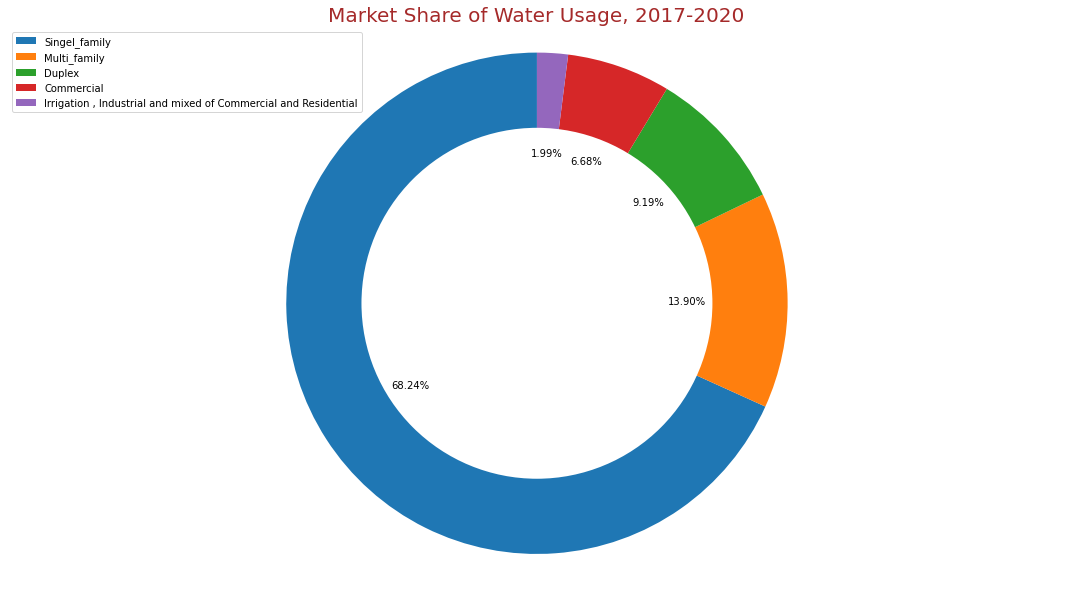

In [308]:
# Pie chart
plt.figure(figsize=(15,8))
data = [68.24, 13.9 ,  9.19,  6.68, 1.99]
labels = ['Singel_family', 'Multi_family', 'Duplex', 'Commercial',
          'Irrigation , Industrial and mixed of Commercial and Residential']

plt.pie(data, autopct='%1.2f%%', startangle=90)


#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Market Share of Water Usage, 2017-2020',fontsize= 20, color= 'brown')
plt.legend(labels, loc='best')
plt.show()

### Now,there is no missing value in Dwelling unit column of dataframes. 
### And about market share:

####    1) There is very small changes in the market share of Singel_family and Duplex.

####    2) The majority of customers (more than 91%) are Residential including single family dwelling, multi-family and duplex houses.

####    3) There are 6.68% commercial customers.  Only 2% of customers used water for commercial and residential, irrigation and industrial usage.

## 5) Visualizing missing values, checking validity of numeric variables

**df1**

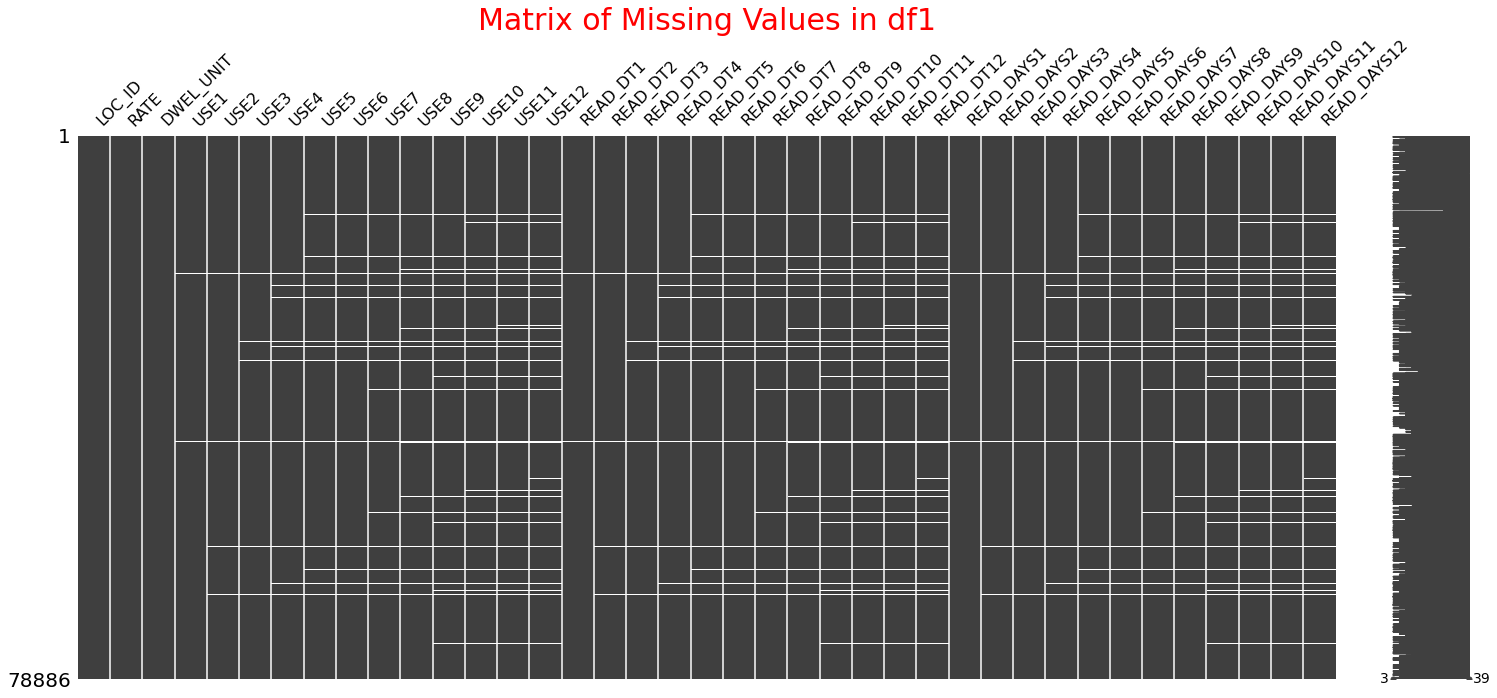

In [309]:
#Find matrix of missing values and plot it
msno.matrix(df1)
plt.title('Matrix of Missing Values in df1', fontsize=30, color='red')
plt.show()

### 5.1) Find previous read date of each read date and caculate the usage per RATE and month, 2017-2018 

**df1**

In [310]:
#Create a new dataframe that each row has a unique id of LOC_ID and RATE, a group of columns of usage, read date and 
#read days which include all values of related columns in main df1. Remaining column of df1 are left intact.

long_df1 =pd.wide_to_long(df1, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
#long_df1['READ_DT'] = long_df1['READ_DT'].dt.strftime('%d-%m-%Y')

long_df1.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0
1,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0
2,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0
3,1000000000,RSFD,4,1.0,9.0,2018-04-11,29.0
4,1000000000,RSFD,5,1.0,10.0,2018-03-13,32.0


In [313]:
#Find the previous read date for each read date based on its associated read days.
long_df1['Previous_READ_DT'] = long_df1['READ_DT'] - pd.to_timedelta(long_df1['READ_DAYS'], unit='D')
long_df1.Previous_READ_DT = pd.to_datetime(long_df1.Previous_READ_DT)
long_df1.head(35)

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11
1,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10
2,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11
3,1000000000,RSFD,4,1.0,9.0,2018-04-11,29.0,2018-03-13
4,1000000000,RSFD,5,1.0,10.0,2018-03-13,32.0,2018-02-09
5,1000000000,RSFD,6,1.0,10.0,2018-02-09,31.0,2018-01-09
6,1000000000,RSFD,7,1.0,11.0,2018-01-09,32.0,2017-12-08
7,1000000000,RSFD,8,1.0,9.0,2017-12-08,31.0,2017-11-07
8,1000000000,RSFD,9,1.0,11.0,2017-11-07,29.0,2017-10-09
9,1000000000,RSFD,10,1.0,13.0,2017-10-09,31.0,2017-09-08


In [317]:
#Dropping the rows that their Read date and previous read date are null
missing_read_date1 = long_df1[long_df1['READ_DT'].isna()]
long_df1 = long_df1[~long_df1['READ_DT'].isna()]
long_df1.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11
1,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10
2,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11
3,1000000000,RSFD,4,1.0,9.0,2018-04-11,29.0,2018-03-13
4,1000000000,RSFD,5,1.0,10.0,2018-03-13,32.0,2018-02-09


In [382]:
missing_read_date1.shape

(30161, 8)

In [318]:
long_df1.shape

(916474, 8)

In [350]:
#Chunk the long_df1 
chunk1 = long_df1.iloc[0:45000,:]
chunk2 = long_df1.iloc[45000:,:]

In [351]:
#Create a list of dataframes, each dataframe with index of month(s) between previous read data and read date, 
#and extracting the month and year of index(s)
def yr_month(small):
    result = []
    for tup in small.itertuples():
        index = pd.PeriodIndex([tup.Previous_READ_DT, tup.READ_DT],freq='M')
        temp = pd.DataFrame([(tup.LOC_ID, tup.RATE, tup.period, tup.DWEL_UNIT, tup.USE, tup.READ_DT,
                             tup.READ_DAYS, tup.Previous_READ_DT)], index= index)
        temp['month'] = temp.index.month
        temp['year'] = temp.index.year
        result.append(temp)
    result = pd.concat(result, axis= 0)
    return result

In [352]:
result1 = yr_month(chunk1)

In [354]:
result2 = yr_month(chunk2)

In [355]:
result1.head()

,0,1,2,3,4,5,6,7,month,year
2018-06,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,6,2018
2018-07,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,7,2018
2018-05,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,5,2018
2018-06,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,6,2018
2018-04,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11,4,2018


In [358]:
result2.head()

,0,1,2,3,4,5,6,7,month,year
2017-12,1000003876,RSFD,7,1.0,8.0,2018-01-10,33.0,2017-12-08,12,2017
2018-01,1000003876,RSFD,7,1.0,8.0,2018-01-10,33.0,2017-12-08,1,2018
2017-11,1000003876,RSFD,8,1.0,13.0,2017-12-08,31.0,2017-11-07,11,2017
2017-12,1000003876,RSFD,8,1.0,13.0,2017-12-08,31.0,2017-11-07,12,2017
2017-10,1000003876,RSFD,9,1.0,22.0,2017-11-07,29.0,2017-10-09,10,2017


In [357]:
print('result1 shape:', result1.shape)
print('result2.shape:', result2.shape)

result1 shape: (90000, 10)
result2.shape: (1742948, 10)


In [359]:
#Concatenate the results of chunks, and rename the columns 
result = pd.concat([result1,result2], axis= 0).reset_index()
result.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)
result.head()

,index,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year
0,2018-06,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,6,2018
1,2018-07,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,7,2018
2,2018-05,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,5,2018
3,2018-06,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,6,2018
4,2018-04,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11,4,2018


In [360]:
print('result shape:', result.shape)

result shape: (1832948, 11)


In [369]:
result1.reset_index(inplace=True)

In [372]:
result1.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)

In [376]:
#Create the month start for each row
result1['month_start'] = pd.to_datetime((result1.year * 10000 + result1.month * 100 + 1).apply(str) , format='%Y%m%d')

#Find number of days in the month
result1['days_in_month'] = result1[['year','month']].apply(lambda x: calendar.monthrange(x[0],x[1])[1], axis= 1)

#Count number of days between start of month and read date
result1['month_start_to_read_date'] = result1[['month_start','READ_DT']].apply(
                                            lambda x:pd.Timedelta(x[1]-x[0],'D').days, axis= 1)

#Count number of days between previous read date and end of the month
result1['previous_read_date_to_month_start'] = result1[['previous_read_date','month_start','days_in_month']].apply(
        lambda x: x[2] - pd.Timedelta(x[0]-x[1],'D').days, axis=1)

#Count number of days in each period
result1['days_in_period'] = result1[['previous_read_date_to_month_start','month_start',\
                                     'month_start_to_read_date','days_in_month']].apply(
    lambda x: x[3] if (x[0] >= x[3] & x[2] >= x[3])
                    else(x[0] if x[0] <= x[3] else x[2]),axis=1)

In [380]:
#Create the month start for each row
result['month_start'] = pd.to_datetime((result.year * 10000 + result1.month * 100 + 1).apply(str) , format='%Y%m%d')

#Find number of days in the month
result['days_in_month'] = result[['year','month']].apply(lambda x: calendar.monthrange(x[0],x[1])[1], axis= 1)

#Count number of days between start of month and read date
result['month_start_to_read_date'] = result[['month_start','READ_DT']].apply(
                                            lambda x:pd.Timedelta(x[1]-x[0],'D').days, axis= 1)

#Count number of days between previous read date and end of the month
result['previous_read_date_to_month_start'] = result[['previous_read_date','month_start','days_in_month']].apply(
        lambda x: x[2] - pd.Timedelta(x[0]-x[1],'D').days, axis=1)

#Count number of days in each period
result['days_in_period'] = result[['previous_read_date_to_month_start','month_start_to_read_date','days_in_month']].apply(
    lambda x: x[2] if (x[2] <= x[1] and x[0] > x[2])
                    else(x[0] if x[0] <= x[2] else x[1]),axis=1)

In [387]:
result['usage_in_period'] = round((result.days_in_period / result.READ_DAYS) * result.USE, 1)

In [391]:
result = result[['LOC_ID', 'RATE', 'period', 'DWEL_UNIT', 'USE', 'READ_DT',
       'READ_DAYS', 'previous_read_date', 'month', 'year', 'month_start',
       'days_in_month', 'month_start_to_read_date',
       'previous_read_date_to_month_start', 'days_in_period',
       'usage_in_period']]

In [392]:
result.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year,month_start,days_in_month,month_start_to_read_date,previous_read_date_to_month_start,days_in_period,usage_in_period
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,6,2018,2018-06-01,30,40.0,20.0,20.0,14.7
1,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,7,2018,2018-07-01,31,10.0,51.0,10.0,7.3
2,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,5,2018,2018-05-01,31,41.0,22.0,22.0,15.1
3,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,6,2018,2018-06-01,30,10.0,52.0,10.0,6.9
4,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11,4,2018,2018-04-01,30,39.0,20.0,20.0,10.3


In [393]:
result.to_csv('df1_clean.csv', index=False)

In [414]:
data2017_18 = pd.DataFrame(result.groupby(['RATE','month_start'])[['DWEL_UNIT','days_in_period','usage_in_period']].sum())
data2017_18.head(20)

DWEL_UNIT  days_in_period  usage_in_period
RATE    month_start                                            
COM     2017-02-01         1.0            17.0              0.6
        2017-05-01         1.0            28.0              2.6
        2017-06-01         4.0            45.0              6.3
        2017-07-01       170.0          1978.0           4054.1
        2017-08-01       443.0          7692.0          14457.8
        2017-09-01       442.0          6636.0          12536.6
        2017-10-01       489.0          7595.0          13738.2
        2017-11-01       453.0          6819.0          11669.4
        2017-12-01       450.0          6989.0          10833.4
        2018-01-01       479.0          7430.0          11561.1
        2018-02-01       429.0          5987.0           8030.3
        2018-03-01       507.0          7909.0          11784.8
        2018-04-01       486.0          7309.0          11671.2
        2018-05-01       534.0          8382.0          15244.7
        2018-06-01       500.0          7455.0          12339.5
        2018-07-01       324.0          5905.0           9934.4
        2018-08-01        72.0           258.0            302.2
COM&RES 2017-07-01        67.0            64.0            109.0
        2017-08-01       142.0           305.0            404.5
        2017-09-01       142.0           270.0            362.1

### 5.2) Find previous read date of each read date and caculate the usage per RATE and month, 2018-2019 

In [415]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df2 in 3 columns.
df2.reset_index(inplace= True)
long_df2 =pd.wide_to_long(df2, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
long_df2.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,RSFD,1,0,1.0,20.0,2019-07-10,30.0
1,1000000000,RSFD,2,0,1.0,13.0,2019-06-10,31.0
2,1000000000,RSFD,3,0,1.0,6.0,2019-05-10,29.0
3,1000000000,RSFD,4,0,1.0,5.0,2019-04-11,30.0
4,1000000000,RSFD,5,0,1.0,5.0,2019-03-12,29.0


In [416]:
#Find the previous read date for each read date based on its associated read days.
long_df2['Previous_READ_DT'] = long_df2['READ_DT'] - pd.to_timedelta(long_df2['READ_DAYS'], unit='D')
long_df2.Previous_READ_DT = pd.to_datetime(long_df2.Previous_READ_DT)
long_df2.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,20.0,2019-07-10,30.0,2019-06-10
1,1000000000,RSFD,2,0,1.0,13.0,2019-06-10,31.0,2019-05-10
2,1000000000,RSFD,3,0,1.0,6.0,2019-05-10,29.0,2019-04-11
3,1000000000,RSFD,4,0,1.0,5.0,2019-04-11,30.0,2019-03-12
4,1000000000,RSFD,5,0,1.0,5.0,2019-03-12,29.0,2019-02-11


In [417]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date2 = long_df2[long_df2['READ_DT'].isna()]
long_df2 = long_df2[~long_df2['READ_DT'].isna()]
long_df2.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,20.0,2019-07-10,30.0,2019-06-10
1,1000000000,RSFD,2,0,1.0,13.0,2019-06-10,31.0,2019-05-10
2,1000000000,RSFD,3,0,1.0,6.0,2019-05-10,29.0,2019-04-11
3,1000000000,RSFD,4,0,1.0,5.0,2019-04-11,30.0,2019-03-12
4,1000000000,RSFD,5,0,1.0,5.0,2019-03-12,29.0,2019-02-11


In [386]:
missing_read_date2.shape

(3470, 8)

In [418]:
long_df2.shape

(943186, 9)

In [422]:
#Chunk the long_df2 
chunk3 = long_df2.iloc[0:310000,:]
chunk4 = long_df2.iloc[310000:620000,:]
chunk5 = long_df2.iloc[620000:,:]

In [423]:
result4 = yr_month(chunk3)

In [425]:
result4.head()

,0,1,2,3,4,5,6,7,month,year
2019-06,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,6,2019
2019-07,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,7,2019
2019-05,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,5,2019
2019-06,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,6,2019
2019-04,1000000000,RSFD,3,1.0,6.0,2019-05-10,29.0,2019-04-11,4,2019


In [426]:
result5 = yr_month(chunk4)

In [427]:
result6 = yr_month(chunk5)

In [429]:
data2 = pd.concat([result4,result5, result6], axis=0).reset_index()

In [432]:
data2.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)

In [433]:
data2.head()

,index,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year,month_start,days_in_month
0,2019-06,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,6,2019,2019-06-01,30
1,2019-07,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,7,2019,2019-07-01,31
2,2019-05,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,5,2019,2019-05-01,31
3,2019-06,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,6,2019,2019-06-01,30
4,2019-04,1000000000,RSFD,3,1.0,6.0,2019-05-10,29.0,2019-04-11,4,2019,2019-04-01,30


In [434]:
#Create the month start for each row
data2['month_start'] = pd.to_datetime((data2.year * 10000 + data2.month * 100 + 1).apply(str) , format='%Y%m%d')

#Find number of days in the month
data2['days_in_month'] = data2[['year','month']].apply(lambda x: calendar.monthrange(x[0],x[1])[1], axis= 1)

#Count number of days between start of month and read date
data2['month_start_to_read_date'] = data2[['month_start','READ_DT']].apply(
                                            lambda x:pd.Timedelta(x[1]-x[0],'D').days, axis= 1)

#Count number of days between previous read date and end of the month
data2['previous_read_date_to_month_start'] = data2[['previous_read_date','month_start','days_in_month']].apply(
        lambda x: x[2] - pd.Timedelta(x[0]-x[1],'D').days, axis=1)

#Count number of days in each period
data2['days_in_period'] = data2[['previous_read_date_to_month_start','month_start_to_read_date','days_in_month']].apply(
    lambda x: x[2] if (x[2] <= x[1] and x[0] > x[2])
                    else(x[0] if x[0] <= x[2] else x[1]),axis=1)
data2['usage_in_period'] = round((data2.days_in_period / data2.READ_DAYS) * data2.USE, 1)

In [435]:
data2 = data2[['LOC_ID', 'RATE', 'period', 'DWEL_UNIT', 'USE', 'READ_DT',
       'READ_DAYS', 'previous_read_date', 'month', 'year', 'month_start',
       'days_in_month', 'month_start_to_read_date',
       'previous_read_date_to_month_start', 'days_in_period',
       'usage_in_period']]

In [436]:
data2.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year,month_start,days_in_month,month_start_to_read_date,previous_read_date_to_month_start,days_in_period,usage_in_period
0,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,6,2019,2019-06-01,30,39,21,21,14.0
1,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,7,2019,2019-07-01,31,9,52,9,6.0
2,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,5,2019,2019-05-01,31,40,22,22,9.2
3,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,6,2019,2019-06-01,30,9,52,9,3.8
4,1000000000,RSFD,3,1.0,6.0,2019-05-10,29.0,2019-04-11,4,2019,2019-04-01,30,39,20,20,4.1


In [437]:
data2.to_csv('df2_clean.csv', index=False)

In [485]:
data2018_19 = pd.DataFrame(data2.groupby(['RATE','month_start'])[['DWEL_UNIT','days_in_period','usage_in_period']].sum())
data2018_19.head(10)

DWEL_UNIT  days_in_period  usage_in_period
RATE month_start                                            
COM  2016-04-01         1.0              20              4.7
     2017-06-01         2.0              30              7.3
     2018-02-01         3.0              23             14.7
     2018-03-01         7.0             107             38.8
     2018-04-01         6.0             107            193.8
     2018-05-01        22.0             350           7150.1
     2018-06-01        80.0            1087          13622.7
     2018-07-01      3853.0           41107         185239.8
     2018-08-01     10076.0          174052         503290.8
     2018-09-01      9437.0          141571         439041.8

### 5.3) Find previous read date of each read date and caculate the usage per RATE and month, 2019-2020 

In [440]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df3 in 3 columns.
df3.reset_index(inplace= True)
long_df3 =pd.wide_to_long(df3, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
long_df3.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,RSFD,1,0,1.0,16.0,2020-07-10,31.0
1,1000000000,RSFD,2,0,1.0,13.0,2020-06-09,29.0
2,1000000000,RSFD,3,0,1.0,20.0,2020-05-11,31.0
3,1000000000,RSFD,4,0,1.0,10.0,2020-04-10,30.0
4,1000000000,RSFD,5,0,1.0,5.0,2020-03-11,29.0


In [441]:
#Find the previous read date for each read date based on its associated read days.
long_df3['Previous_READ_DT'] = long_df3['READ_DT'] - pd.to_timedelta(long_df3['READ_DAYS'], unit='D')
long_df3.Previous_READ_DT = pd.to_datetime(long_df3.Previous_READ_DT)
long_df3.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,16.0,2020-07-10,31.0,2020-06-09
1,1000000000,RSFD,2,0,1.0,13.0,2020-06-09,29.0,2020-05-11
2,1000000000,RSFD,3,0,1.0,20.0,2020-05-11,31.0,2020-04-10
3,1000000000,RSFD,4,0,1.0,10.0,2020-04-10,30.0,2020-03-11
4,1000000000,RSFD,5,0,1.0,5.0,2020-03-11,29.0,2020-02-11


In [442]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date3 = long_df3[long_df3['READ_DT'].isna()]
long_df3 = long_df3[~long_df3['READ_DT'].isna()]
long_df3.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,16.0,2020-07-10,31.0,2020-06-09
1,1000000000,RSFD,2,0,1.0,13.0,2020-06-09,29.0,2020-05-11
2,1000000000,RSFD,3,0,1.0,20.0,2020-05-11,31.0,2020-04-10
3,1000000000,RSFD,4,0,1.0,10.0,2020-04-10,30.0,2020-03-11
4,1000000000,RSFD,5,0,1.0,5.0,2020-03-11,29.0,2020-02-11


In [443]:
missing_read_date3.shape

(3209, 9)

In [445]:
long_df3.shape

(943423, 9)

In [446]:
#Chunk the long_df3 
chunk6 = long_df3.iloc[0:310000,:]
chunk7 = long_df3.iloc[310000:620000,:]
chunk8 = long_df3.iloc[620000:,:]

In [447]:
result7 = yr_month(chunk6)

In [448]:
result8 = yr_month(chunk7)

In [449]:
result9 = yr_month(chunk8)

In [450]:
data3 = pd.concat([result7,result8, result9], axis=0).reset_index()

In [451]:
data3.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)

In [452]:
#Create the month start for each row
data3['month_start'] = pd.to_datetime((data3.year * 10000 + data3.month * 100 + 1).apply(str) , format='%Y%m%d')

#Find number of days in the month
data3['days_in_month'] = data3[['year','month']].apply(lambda x: calendar.monthrange(x[0],x[1])[1], axis= 1)

#Count number of days between start of month and read date
data3['month_start_to_read_date'] = data3[['month_start','READ_DT']].apply(
                                            lambda x:pd.Timedelta(x[1]-x[0],'D').days, axis= 1)

#Count number of days between previous read date and end of the month
data3['previous_read_date_to_month_start'] = data3[['previous_read_date','month_start','days_in_month']].apply(
        lambda x: x[2] - pd.Timedelta(x[0]-x[1],'D').days, axis=1)

#Count number of days in each period
data3['days_in_period'] = data3[['previous_read_date_to_month_start','month_start_to_read_date','days_in_month']].apply(
    lambda x: x[2] if (x[2] <= x[1] and x[0] > x[2])
                    else(x[0] if x[0] <= x[2] else x[1]),axis=1)
data3['usage_in_period'] = round((data3.days_in_period / data3.READ_DAYS) * data3.USE, 1)

In [453]:
data3 = data3[['LOC_ID', 'RATE', 'period', 'DWEL_UNIT', 'USE', 'READ_DT',
       'READ_DAYS', 'previous_read_date', 'month', 'year', 'month_start',
       'days_in_month', 'month_start_to_read_date',
       'previous_read_date_to_month_start', 'days_in_period',
       'usage_in_period']]

In [454]:
data3.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year,month_start,days_in_month,month_start_to_read_date,previous_read_date_to_month_start,days_in_period,usage_in_period
0,1000000000,RSFD,1,1.0,16.0,2020-07-10,31.0,2020-06-09,6,2020,2020-06-01,30,39,22,22,11.4
1,1000000000,RSFD,1,1.0,16.0,2020-07-10,31.0,2020-06-09,7,2020,2020-07-01,31,9,53,9,4.6
2,1000000000,RSFD,2,1.0,13.0,2020-06-09,29.0,2020-05-11,5,2020,2020-05-01,31,39,21,21,9.4
3,1000000000,RSFD,2,1.0,13.0,2020-06-09,29.0,2020-05-11,6,2020,2020-06-01,30,8,51,8,3.6
4,1000000000,RSFD,3,1.0,20.0,2020-05-11,31.0,2020-04-10,4,2020,2020-04-01,30,40,21,21,13.5


In [455]:
data3.to_csv('df3_clean.csv', index=False)

In [484]:
data2019_20 = pd.DataFrame(result.groupby(['RATE','month_start'])[['DWEL_UNIT','days_in_period','usage_in_period']].sum())
data2019_20.head()

DWEL_UNIT  days_in_period  usage_in_period
RATE month_start                                            
COM  2017-02-01         1.0            17.0              0.6
     2017-05-01         1.0            28.0              2.6
     2017-06-01         4.0            45.0              6.3
     2017-07-01       170.0          1978.0           4054.1
     2017-08-01       443.0          7692.0          14457.8

### 5.4) Integrating the data, 2017-2020

In [480]:
data2017_20 = pd.concat([data2017_18.reset_index(), data2018_19.reset_index(), data2019_20.reset_index()],axis=0)
data2017_20 = data2017_20.groupby(['RATE','month_start'])[['DWEL_UNIT','days_in_period','usage_in_period']].sum()
data2017_20 = data2017_20.reset_index()
data2017_20.head()

,RATE,month_start,DWEL_UNIT,days_in_period,usage_in_period
0,COM,2016-04-01,1.0,20.0,4.7
1,COM,2017-02-01,2.0,34.0,1.2
2,COM,2017-05-01,2.0,56.0,5.2
3,COM,2017-06-01,10.0,120.0,19.9
4,COM,2017-07-01,340.0,3956.0,8108.2


In [483]:
data2017_20.to_csv('data_clean.csv', index=False)